## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana pengaruh lingkungan terhadap kegiatan bike sharing, seperti kondisi cuaca/suhu/angin yang seperti apa dimana kegiatan bike sharing berada pada puncaknya.
- Pertanyaan 2
Bagaimana pengaruh waktu seperti hari terhadap kegiatan bike sharing? Kapan kegiatan bike sharing paling sering dilakukan?
- Pertanyaan 3
Seberapa banyak customer yang sudah registrasi ketika menggunakan Bike-Sharing?

## Import Semua Packages/Library yang Digunakan

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Andrew Octavious   
- **Email:** andrew.octavious@gmail.com
- **ID Dicoding:** ANDREW OCTAVIOUS

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.ticker as ticker


## Data Wrangling

### Gathering Data

In [21]:
days_df = pd.read_csv('C:/Users/User/Documents/tugas-akhir/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
hour_df = pd.read_csv('C:/Users/User/Documents/tugas-akhir/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [22]:
print('duplikat:',days_df.duplicated().sum())
days_df.info()
days_df.isna().sum()
days_df.describe()




duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
print('duplikat:',hour_df.duplicated().sum())
hour_df.info()
hour_df.isna().sum()
hour_df.describe()


duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt       

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- dtype pada kolom dteday seharusnya datetime bukan object
- jumlah non null count sama pada setiap kolom menandakan tidak ada data yang kosong
- tidak terdapat data yang N/A
- tidak terdapat duplikasi pada data


### Cleaning Data

In [19]:
for datetime_columns in [days_df, hour_df]:
    datetime_columns['dteday'] = pd.to_datetime(datetime_columns['dteday'])

hour_df.info()
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- dtype berhasil di ubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [36]:
total_casual = days_df['casual'].sum()
total_cnt = days_df['cnt'].sum()
total_casual_percentage = (total_casual / total_cnt) * 100
print(f"presentase casual: {total_casual_percentage:.2F}%")

presentase casual: 18.83%


In [33]:
hour_df.groupby(by="temp").agg({
    "cnt":"sum"
    })

,cnt
temp,
0.02,712
0.04,570
0.06,672
0.08,480
0.10,2514
0.12,4440
0.14,7605
0.16,15083
0.18,9318


In [100]:
hour_df.groupby(by="windspeed").agg({
    "cnt":"sum",
    })

,cnt
windspeed,
0.0000,350203
0.0896,213804
0.1045,268821
0.1343,306423
0.1642,332998
0.1940,332407
0.2239,320678
0.2537,276880
0.2836,225882


In [98]:
hour_df.groupby(by="weathersit").agg({
    "cnt":"sum",
    })

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


In [107]:
hour_df.groupby(by="season").agg({
    "cnt":"sum",
    })

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [37]:
hour_df.groupby(by="hr").agg({
    "cnt":"sum",
    })

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


In [99]:

hour_df.groupby(by="workingday").agg({
    "cnt":"sum",
    })

,cnt
workingday,
0,1000269
1,2292410


**Insight:**
- Kondisi cuaca berpengaruh positif terhadap rental sepeda, semakin buruk kondisi cuaca maka semakin rendah pengguna rental sepeda begitu pula sebaliknya
- Dari seluruh pengguna yang belum register sebesar 18.83%
- Banyak orang yang menggunakan sepeda rental di hari kerja
- Banyak orang yang menggunakan sepeda rental di kondisi yang tidak berangin
- Banyak orang yang menggunakan sepeda ketika suhu tidak terlalu panas/dingin
- rental sepeda banyak digunakan di musim panas dan gugur

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh lingkungan terhadap kegiatan bike sharing, seperti kondisi cuaca/suhu/angin yang seperti apa dimana kegiatan bike sharing berada pada puncaknya.


C:\Users\User\AppData\Local\Temp\ipykernel_8496\3926836503.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupedhum_df = hour_df.groupby('Humidity_range')['Total_Customer'].sum().reset_index()


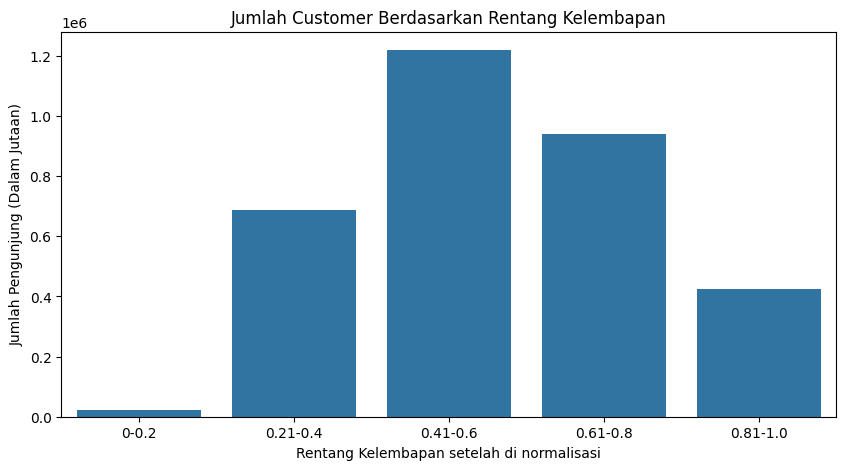

  Humidity_range  Total_Customer
0          0-0.2           20842
1       0.21-0.4          686843
2       0.41-0.6         1219823
3       0.61-0.8          939003
4       0.81-1.0          425545


In [20]:
days_df = pd.read_csv('C:/Users/User/Documents/tugas-akhir/day.csv')
hour_df = pd.read_csv('C:/Users/User/Documents/tugas-akhir/hour.csv')
hour_df.rename(columns={
    "cnt":"Total_Customer",
    "atemp":"Temperature",
    "casual":"Unregistered",
    "hum":"Humidity"
},inplace=True)

bins= [0, 0.2 ,0.4, 0.6, 0.8, 1]
labels=['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1.0']
hour_df['Humidity_range'] = pd.cut(hour_df['Humidity'], bins=bins, labels=labels)

groupedhum_df = hour_df.groupby('Humidity_range')['Total_Customer'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    y="Total_Customer",
    x="Humidity_range",
    data=groupedhum_df,
    estimator=sum
)
plt.title('Jumlah Customer Berdasarkan Rentang Kelembapan')
plt.xlabel('Rentang Kelembapan setelah di normalisasi')
plt.ylabel('Jumlah Pengunjung (Dalam Jutaan)')
plt.show()

print(groupedhum_df)


C:\Users\User\AppData\Local\Temp\ipykernel_8496\3832656181.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupedwind_df = hour_df.groupby('Windspeed_range')['Total_Customer'].sum().reset_index()


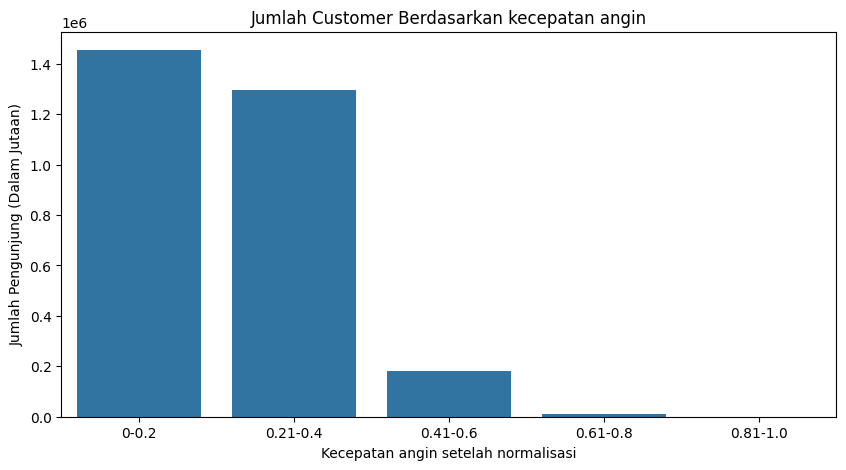

  Windspeed_range  Total_Customer
0           0-0.2         1454453
1        0.21-0.4         1297390
2        0.41-0.6          180794
3        0.61-0.8            9077
4        0.81-1.0             762


In [ ]:
bins= [0, 0.2 ,0.4, 0.6, 0.8, 1]
labels=['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1.0']
hour_df['Windspeed_range'] = pd.cut(hour_df['windspeed'], bins=bins, labels=labels)

groupedwind_df = hour_df.groupby('Windspeed_range')['Total_Customer'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    y="Total_Customer",
    x="Windspeed_range",
    data=groupedwind_df,
    estimator=sum
)
plt.title('Jumlah Customer Berdasarkan kecepatan angin')
plt.xlabel('Kecepatan angin setelah normalisasi')
plt.ylabel('Jumlah Pengunjung (Dalam Jutaan)')
plt.show()

print(groupedwind_df)


C:\Users\User\AppData\Local\Temp\ipykernel_8496\2579299205.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupedtemp_df = hour_df.groupby('Temperature_range')['Total_Customer'].sum().reset_index()


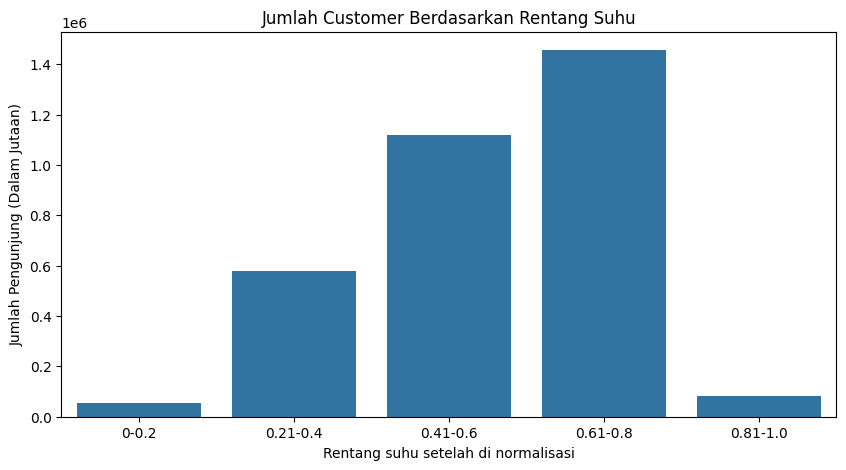

  Temperature_range  Total_Customer
0             0-0.2           54903
1          0.21-0.4          578290
2          0.41-0.6         1119088
3          0.61-0.8         1456258
4          0.81-1.0           84101


In [22]:
bins= [0, 0.2 ,0.4, 0.6, 0.8, 1]
labels=['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1.0']
hour_df['Temperature_range'] = pd.cut(hour_df['Temperature'], bins=bins, labels=labels)

groupedtemp_df = hour_df.groupby('Temperature_range')['Total_Customer'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    y="Total_Customer",
    x="Temperature_range",
    data=groupedtemp_df,
    estimator=sum
)
plt.title('Jumlah Customer Berdasarkan Rentang Suhu')
plt.xlabel('Rentang suhu setelah di normalisasi')
plt.ylabel('Jumlah Pengunjung (Dalam Jutaan)')
plt.show()

print(groupedtemp_df)


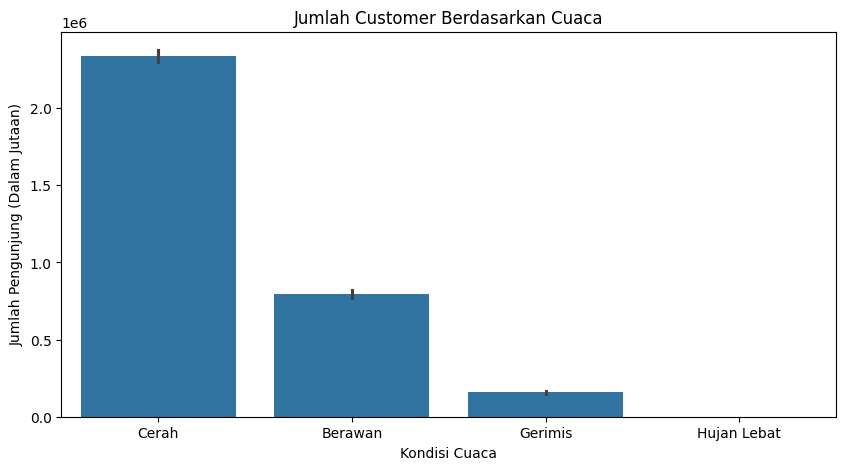

weathersit
1    2338173
2     795952
3     158331
4        223
Name: Total_Customer, dtype: int64


In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(
    y="Total_Customer",
    x="weathersit",
    data=hour_df,
    estimator=sum
)

weather_labels = {0: "Cerah", 1: "Berawan", 2: "Gerimis", 3: "Hujan Lebat"}

plt.title('Jumlah Customer Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengunjung (Dalam Jutaan)')
plt.xticks(ticks=list(weather_labels.keys()), labels=list(weather_labels.values()))
plt.show()


cek_aggregasi = hour_df.groupby("weathersit")["Total_Customer"].sum()
print(cek_aggregasi)


In [24]:
Pengaruh = ["Total_Customer","Temperature","Humidity","weathersit","windspeed"]
korelasi = hour_df[Pengaruh].corr()
print(korelasi)

                Total_Customer  Temperature  Humidity  weathersit  windspeed
Total_Customer        1.000000     0.400929 -0.322911   -0.142426   0.093234
Temperature           0.400929     1.000000 -0.051918   -0.105563  -0.062336
Humidity             -0.322911    -0.051918  1.000000    0.418130  -0.290105
weathersit           -0.142426    -0.105563  0.418130    1.000000   0.026226
windspeed             0.093234    -0.062336 -0.290105    0.026226   1.000000


### Insights
Kondisi Kelembapan, kecepatan angin, temperature, dan kondisi cuaca memiliki pengaruh terhadap jumlah pelanggan yang menggunakan jasa rental sepeda.

Penggunaan jasa rental berada pada puncaknya ketika kondisi cuaca cerah, tidak berangin, suhu setelah di normalisasi berada pada rentang 0.6-0.8, dan angin tidak terlalu kencang yakni berada pada rentang 0-0.2 untuk kecepatan angin setelah di normalisasi.


### Pertanyaan 2: 
Bagaimana pengaruh waktu seperti hari,musim,jam terhadap kegiatan bike sharing? Kapan kegiatan bike sharing paling sering dilakukan?

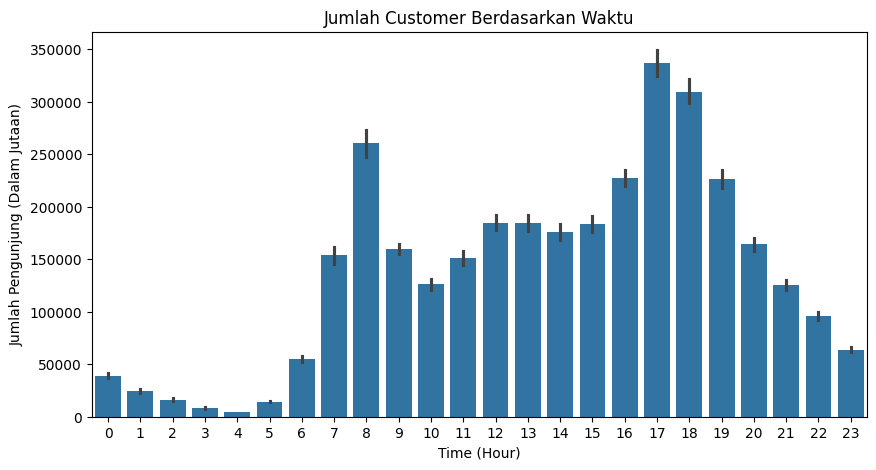

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: Total_Customer, dtype: int64


In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(
    y="Total_Customer",
    x="hr",
    data=hour_df,
    estimator=sum
)

plt.title('Jumlah Customer Berdasarkan Waktu')
plt.xlabel('Time (Hour)')
plt.ylabel('Jumlah Pengunjung (Dalam Jutaan)')
plt.show()


cek_aggregasi = hour_df.groupby("hr")["Total_Customer"].sum()
print(cek_aggregasi)

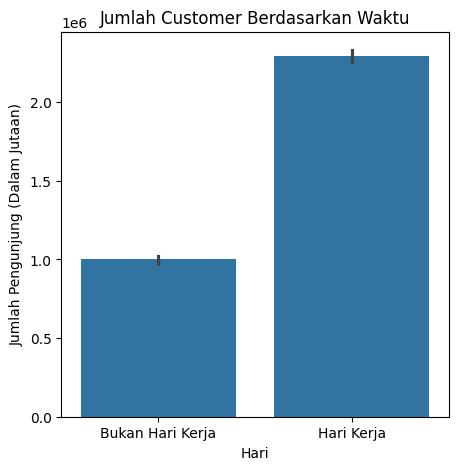

workingday
0    1000269
1    2292410
Name: Total_Customer, dtype: int64


In [26]:
plt.figure(figsize=(5, 5))
sns.barplot(
    y="Total_Customer",
    x="workingday",
    data=hour_df,
    estimator=sum
)

days_label = {0: "Bukan Hari Kerja", 1: "Hari Kerja"}

plt.title('Jumlah Customer Berdasarkan Waktu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengunjung (Dalam Jutaan)')
plt.xticks(ticks=list(days_label.keys()), labels=list(days_label.values()))
plt.show()

cek_aggregasi = hour_df.groupby("workingday")["Total_Customer"].sum()
print(cek_aggregasi)

### Insights
Berdasarkan data jam, hari, dan musim, kita dapat mengenal customer kita seperti pada data di atas dapat disimpulkan bahwa banyak customer kita yang menggunakan sepedah kita di hari kerja dan di jam berangkat-pulang kerja. Selain itu banyak pengguna kita yang menggunakan sepeda di musim panas dan gugur.

### Pertanyaan 3:
Seberapa banyak customer yang sudah registrasi ketika menggunakan Bike-Sharing?

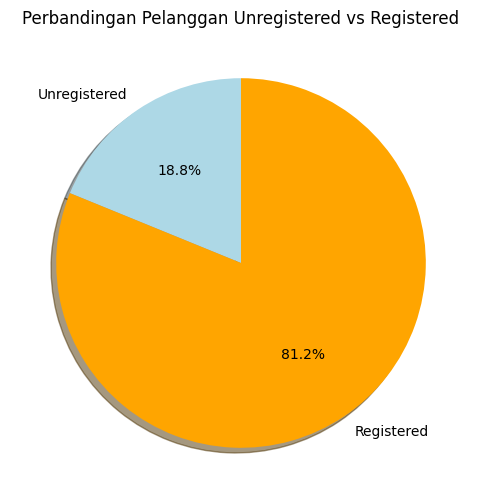

In [27]:

Total_Unregistered = hour_df["Unregistered"].sum()
total_registered = hour_df["registered"].sum()
labels = ["Unregistered", "Registered"]
sizes = [Total_Unregistered, total_registered]
colors = ["lightblue", "orange"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)

plt.title("Perbandingan Pelanggan Unregistered vs Registered")
plt.show()

### Insight
Ada sekitar 18.8% pengguna jasa rental sepedah kita yang belum registrasi

In [23]:
hour_df.to_csv("dashboard/main_data.csv", index=False)

## Analisis Lanjutan (Opsional)

Analisis Lanjutan akan dilakukan menggunakan metode Manual grouping, berdasarkan hasil Visualization & Explanatory Analysis kita dapat menyimpulkan banyak pelanggan kita yang menggunakan jasa rental sepeda sebagai transportasi mereka untuk pergi dan pulang bekerja. Hal tersebut dapat dipastikan dengan peningkatan rutin setiap hari kerja, yakni pada jam 7-8 dan 17-18 yang sangat dekat dengan jam kerja yakni 9 to 5.

## Conclusion

- Conclution pertanyaan 1
Lingkungan berperan penting dalam mempengaruhi apakah seorang calon customer akan memilih sepeda atau tidak, seperti ketika hujan deras, angin berhembus kencang, suhu yang terlalu panas atau dingin makan customer akan memilih untuk menggunakan bus atau transportasi lainnya. Mengetahui hal ini kita dapat membuat sistem dimana mungkin para pengguna sepeda yang registered akan mendapatkan benefit tambahan ketika menggunakan sepeda di saat saat yang kurang mendukung. Seperti mendapatkan voucher minuman gratis jika mereka menggunakan sepeda saat keadaan sedang panas.

- Conclution pertanyaan 2
Banyak dari pengguna sepeda kita yang hanya menggunakan sepeda kita untuk pergi dan pulang bekerja, mungkin kita dapat memperkenalkan jenis sepeda yang cocok untuk digunakan saat Holiday seperti sepeda keluarga yang panjang kepada pengguna yang sudah registrasi.

- Conclution pertanyaan 
Walaupun hampir sebagian besar dari pengguna kita suda registrasi, namun masih ada 18.8% dari user kita yang belum registrasi. Untuk mendorong pengguna kita yang belum registrasi kita dapat memberikan benefit - benefit tambahan seperti di saat Peak-Time kita memberikan tarif yang lebih murah bagi yang sudah registrasi dan kita memberikan benefit tambahan bagi para pengguna yang sudah registrasi di saat sepi seperti cuaca yang kurang mendukung.